<a href="https://colab.research.google.com/github/Mahima2208/Rossman-Sales-Prediction-Supervised-/blob/main/Rossman_Sales_Prediction_Mahima_Phalkey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [93]:
#Importing all the libarary
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
rossman_dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cohort Tosh/Capstone Project/Linear Regression/Retail Sales Prediction/Data & Resources/Rossmann Stores Data.csv',sep=',', parse_dates=['Date'],
                    dtype={'StateHoliday': str, 'SchoolHoliday':str})

store_dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cohort Tosh/Capstone Project/Linear Regression/Retail Sales Prediction/Data & Resources/store.csv',sep=",", dtype={'StoreType': str,
                                                      'Assortment': str,
                                                      'PromoInterval': str})

In [96]:
rossman_dataset.shape

(1017209, 9)

In [97]:
rossman_dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [98]:
rossman_dataset.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [99]:
store_dataset.shape

(1115, 10)

In [100]:
store_dataset.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [101]:
store_dataset.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [102]:
rossman_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 69.8+ MB


In [103]:
store_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [104]:
rossman_dataset.describe(include="all")

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1017209
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,4,2
top,NaN,NaN,2015-07-31 00:00:00,NaN,NaN,NaN,NaN,0,0
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,986159,835488
first,NaN,NaN,2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2015-07-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,NaN
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,NaN
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,NaN


In [105]:
store_dataset.describe(include="all")

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


In [106]:
len(store_dataset['Store']) - sum(store_dataset['Store'].isin(rossman_dataset['Store']))


0

In [107]:
StoreStore = pd.Series(store_dataset['Store']); StoreTrain = pd.Series(rossman_dataset['Store'])

sum(StoreTrain.isin(StoreStore) == False)

0

In [108]:
rossman_store = pd.merge(rossman_dataset, store_dataset, how = 'left', on='Store')

In [109]:
rossman_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [110]:
rossman_dataset.loc[rossman_dataset['Open'] == 0, 'Sales'].mean()

0.0

In [111]:
rossman_store.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [112]:
rossman_store.drop(['Promo2SinceYear','PromoInterval','Promo2SinceWeek'], axis = 1, inplace = True)

In [113]:
Date_feat = ['Date','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']

In [114]:
num_features = [feature for feature in rossman_store.columns if rossman_store[feature].dtypes != 'O' and feature not in Date_feat]
categorical_feat = [feature for feature in rossman_store.columns if feature not in num_features + Date_feat]

In [115]:
print(num_features)

['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'CompetitionDistance', 'Promo2']


In [116]:
print(categorical_feat)

['StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment']


In [117]:
rossman_dataset['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [118]:
disc_num = [feature for feature in num_features if rossman_store[feature].nunique() < 1120]
cont_num = [feature for feature in num_features if feature not in disc_num]

In [119]:
store_dataset.shape

(1115, 10)

In [120]:
print(disc_num)

['Store', 'DayOfWeek', 'Open', 'Promo', 'CompetitionDistance', 'Promo2']


In [121]:
print(cont_num)

['Sales', 'Customers']


In [122]:
rossman_store=rossman_store[rossman_store['Open']==1]

In [123]:
rossman_store.drop('Open',axis=1)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1,b,a,150.0,9.0,2006.0,0
1016827,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.0,10.0,1999.0,0
1016863,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.0,NaN,NaN,1
1017042,948,2,2013-01-01,4491,1039,0,a,1,b,b,1430.0,NaN,NaN,0


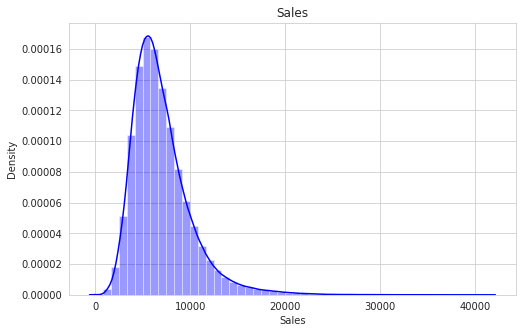

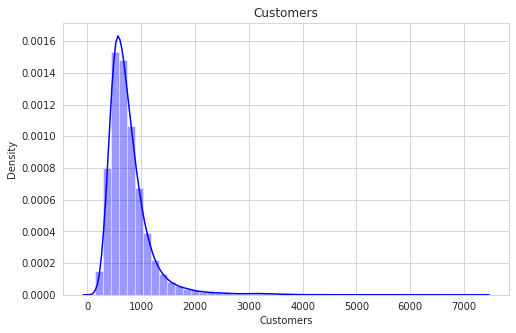

In [124]:
for feature in cont_num:
    plt.figure(figsize = (8,5))
    sns.set_style("whitegrid")
    sns.distplot(rossman_store[feature], hist = True,color='b')
    plt.title(feature)
    plt.show()

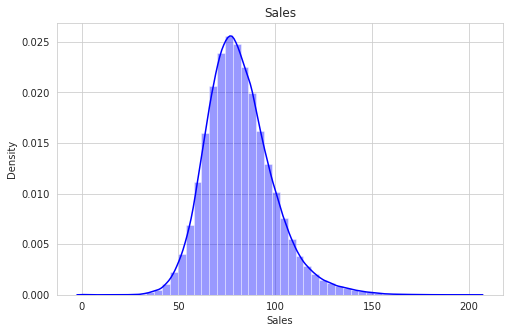

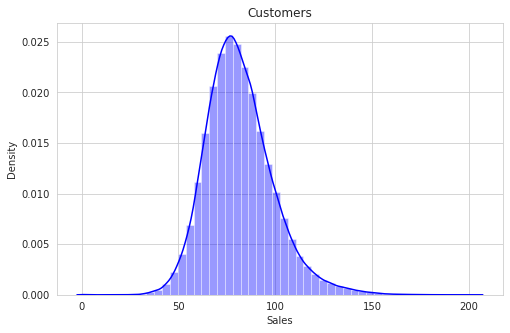

In [125]:
for feature in cont_num:
    plt.figure(figsize = (8,5))
    sns.set_style("whitegrid")
    sns.distplot(np.sqrt(rossman_store['Sales']-((min(rossman_store['Sales']) - 1))), hist = True,color='b')
    plt.title(feature)
    plt.show()



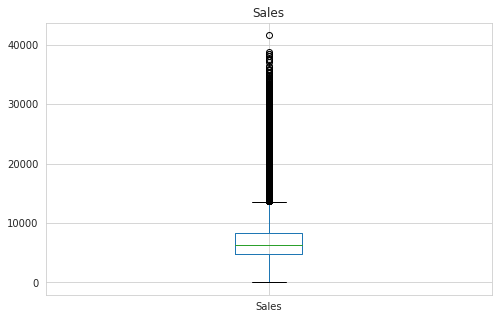

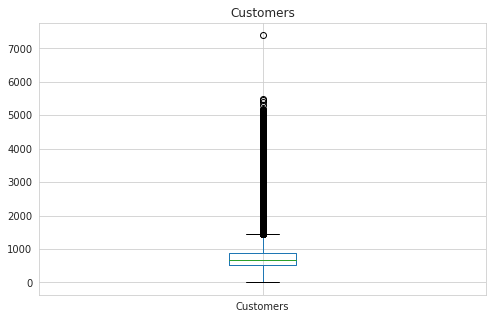

In [126]:
for feature in cont_num:
    plt.figure(figsize = (8,5))
    sns.set_style("whitegrid")
    rossman_store.boxplot(column = feature)
    plt.title(feature)
    plt.show()

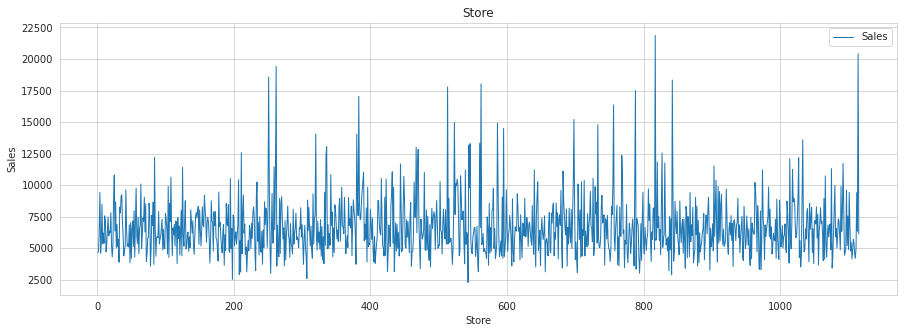

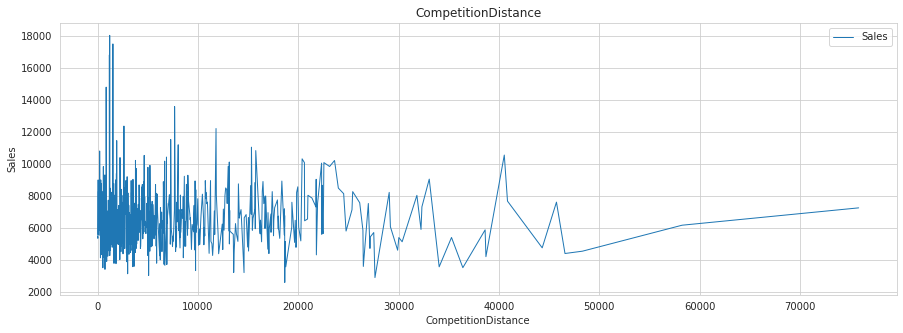

In [127]:
for feature in disc_num:
    if feature in ['Store','CompetitionDistance']:
        sns.set_style("whitegrid")
        rossman_store.pivot_table('Sales', index= feature, aggfunc='median').plot(lw = 1, figsize = (15,5))
        plt.title(feature)
        plt.ylabel("Sales")

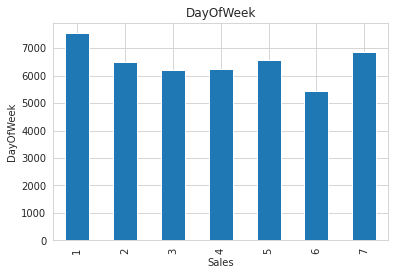

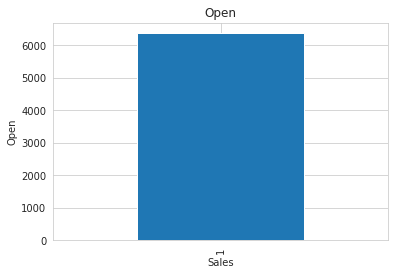

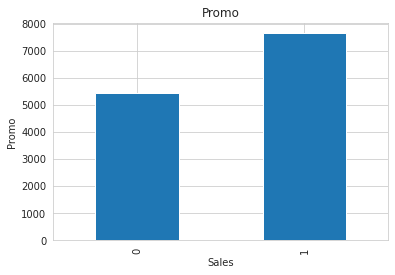

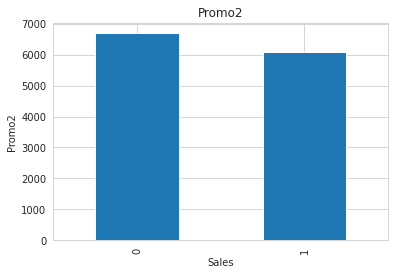

In [128]:
for feature in disc_num:
    if feature not in ['Store','CompetitionDistance']:
        plt.figure()
        rossman_store.groupby(feature)['Sales'].median().plot(kind='bar',figsize = (6,4))
        plt.title(feature)
        plt.xlabel('Sales')
        plt.ylabel(feature)
        plt.show()

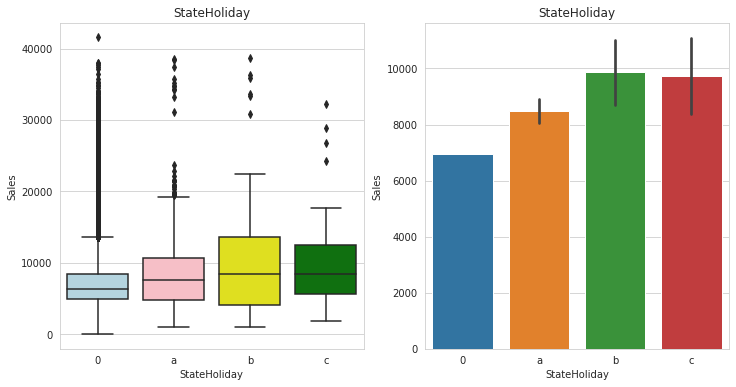

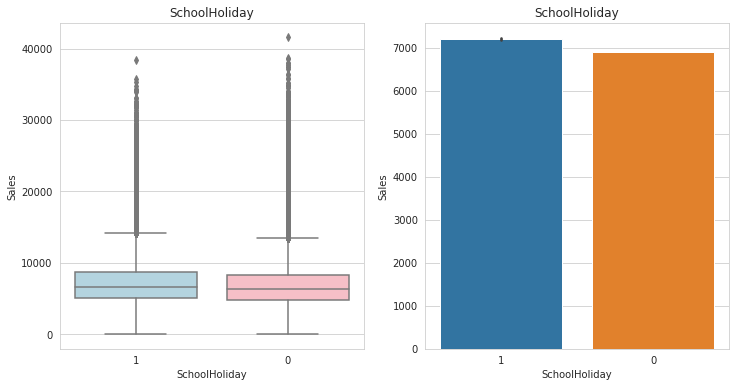

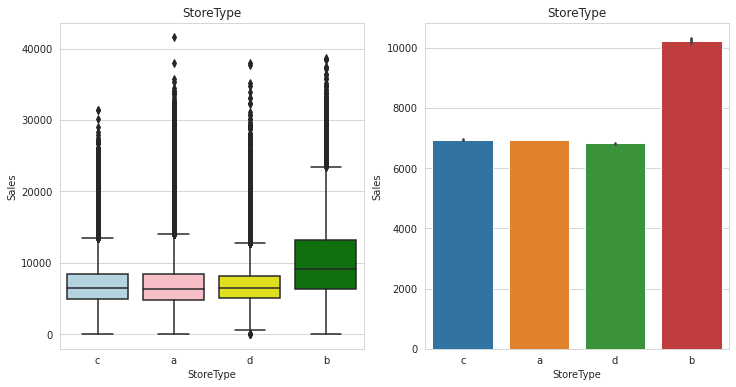

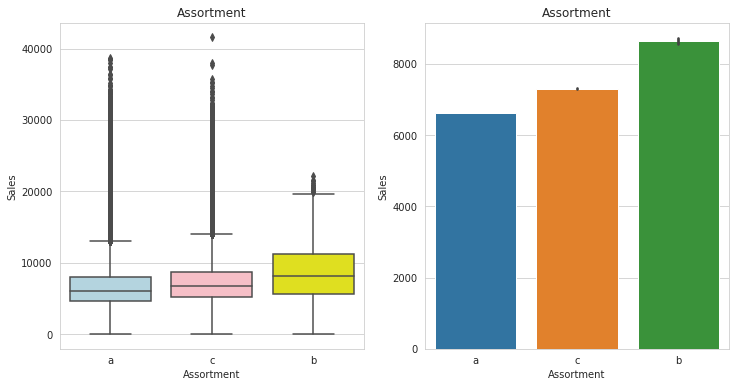

In [129]:
  # adds jitter to the data points - can be adjusted
for feature in categorical_feat:
    plt.figure(figsize = (12,6))
    plt.subplot(1, 2, 1) 
    sns.boxplot(feature, 'Sales', data = rossman_store,dodge='true', palette = ['lightblue','lightpink','yellow','green'])
    plt.title(feature)
    plt.ylabel("Sales")
    plt.subplot(1, 2, 2)
    sns.barplot(feature, 'Sales', data = rossman_store)
    plt.title(feature)
    plt.ylabel("Sales")

In [130]:
def replace_na_with_median(data):
  rossman_store[data].fillna(round(rossman_store[data].median(),2),inplace=True)

In [131]:
rossman_store.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268619
CompetitionOpenSinceYear     268619
Promo2                            0
dtype: int64

In [132]:
replace_na_with_median('CompetitionOpenSinceYear')
replace_na_with_median('CompetitionOpenSinceMonth')
replace_na_with_median('CompetitionDistance')

In [133]:
rossman_store.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
dtype: int64

In [134]:
len(rossman_store[rossman_store.duplicated()])

0

In [135]:
rossman_store.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                        object
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
dtype: object

In [136]:
rossman_store['CompetitionOpenMonthYear'] = rossman_store['CompetitionOpenSinceYear'] + (rossman_store['CompetitionOpenSinceMonth']/12)

rossman_store.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis = 1, inplace = True)



In [137]:
rossman_store['Year'] = pd.DatetimeIndex(rossman_store['Date']).year
rossman_store['Month'] = pd.DatetimeIndex(rossman_store['Date']).month
rossman_store['Day'] =pd.DatetimeIndex(rossman_store['Date']).day
rossman_store=rossman_store.reset_index()

In [138]:
rossman_store=rossman_store.drop('Date',axis=1)

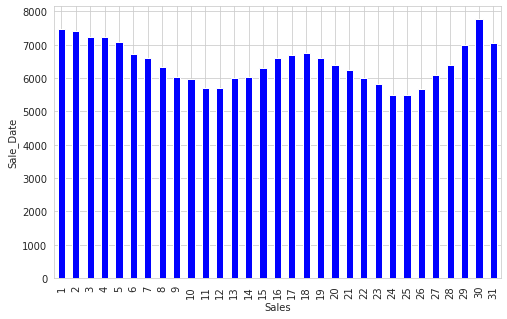

In [139]:
plt.figure(figsize = (8,5))
rossman_store.groupby('Day')['Sales'].median().plot(kind = 'bar', color = 'blue')
plt.xlabel("Sales")
plt.ylabel("Sale_Date")
plt.show()

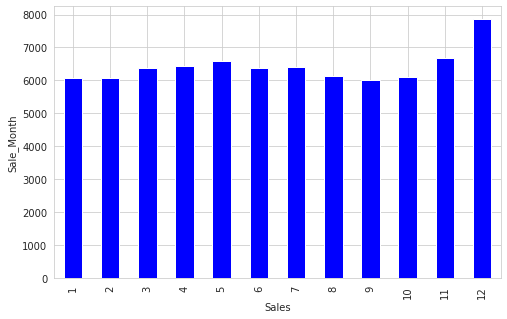

In [140]:
plt.figure(figsize = (8,5))
rossman_store.groupby('Month')['Sales'].median().plot(kind = 'bar', color = 'blue')
plt.xlabel("Sales")
plt.ylabel("Sale_Month")
plt.show()

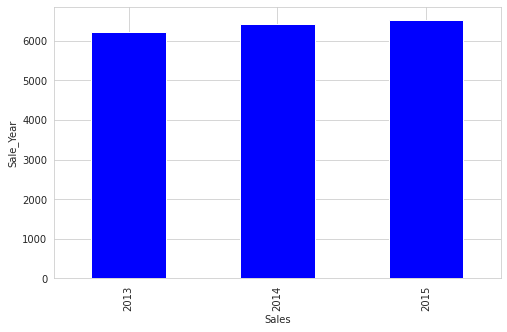

In [141]:
plt.figure(figsize = (8,5))
rossman_store.groupby('Year')['Sales'].median().plot(kind = 'bar', color = 'blue')
plt.xlabel("Sales")
plt.ylabel("Sale_Year")
plt.show()

In [142]:
rossman_store=rossman_store.drop("index",axis=1)

In [143]:
def factor_to_integer(df, colname, start_value=0):
    while df[colname].dtype == object:
        myval = start_value 
        for sval in df[colname].unique():
            df.loc[df[colname] == sval, colname] = myval
            myval += 1
        df[colname] = df[colname].astype(int, copy=False)
    print('levels :', df[colname].unique(), '; data type :', df[colname].dtype)

In [144]:
rossman_store.dtypes

Store                         int64
DayOfWeek                     int64
Sales                         int64
Customers                     int64
Open                          int64
Promo                         int64
StateHoliday                 object
SchoolHoliday                object
StoreType                    object
Assortment                   object
CompetitionDistance         float64
Promo2                        int64
CompetitionOpenMonthYear    float64
Year                          int64
Month                         int64
Day                           int64
dtype: object

In [145]:
factor_to_integer(rossman_store, 'SchoolHoliday')
factor_to_integer(rossman_store, 'StateHoliday')
factor_to_integer(rossman_store, 'Assortment')
factor_to_integer(rossman_store, 'StoreType')

levels : [0 1] ; data type : int64
levels : [0 1 2 3] ; data type : int64
levels : [0 1 2] ; data type : int64
levels : [0 1 2 3] ; data type : int64


In [146]:
rossman_store['CompetitionDistance']=rossman_store['CompetitionDistance'].astype(int)

Text(0.5, 1.0, 'Correlation Map')

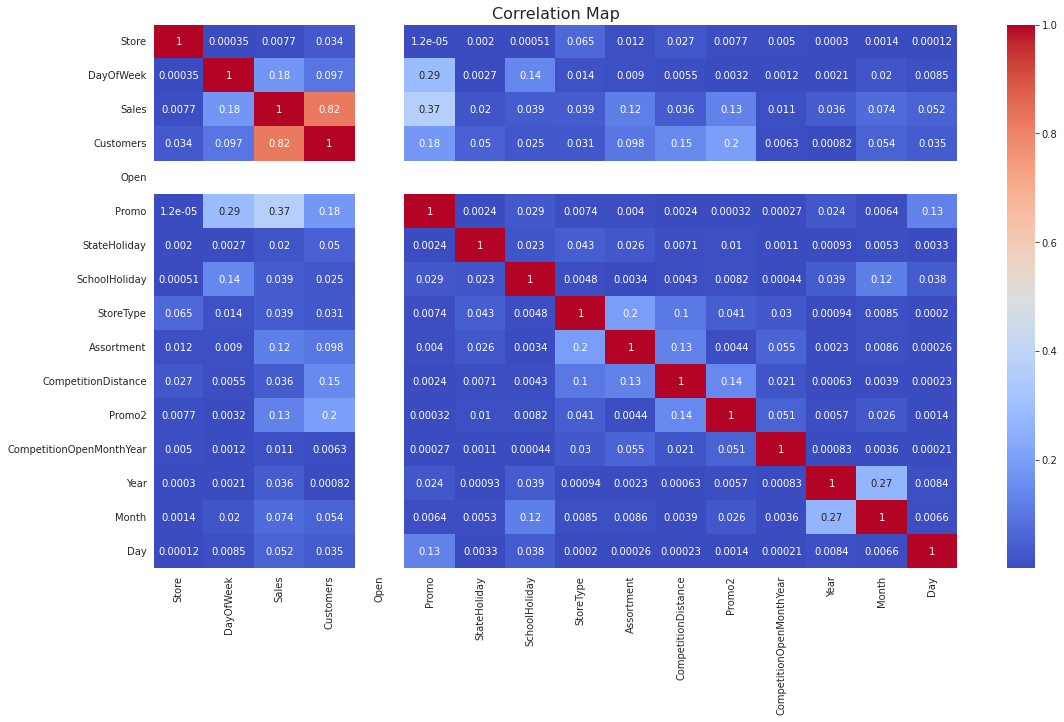

In [147]:
plt.figure(figsize=(18,10))
correlation = rossman_store.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.title("Correlation Map", fontsize=16)

In [148]:
X = rossman_store.drop('Sales', axis = 1)
y = rossman_store['Sales']


In [149]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [150]:
calc_vif(rossman_store[[i for i in rossman_store.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,1.006320e+00
1,DayOfWeek,1.115651e+00
2,Customers,1.148882e+00
3,Open,7.407513e+06
4,Promo,1.143023e+00
5,StateHoliday,1.005339e+00
6,SchoolHoliday,1.036353e+00
7,StoreType,1.058949e+00
8,Assortment,1.077066e+00
9,CompetitionDistance,1.089449e+00


In [151]:
calc_vif(rossman_store[[i for i in rossman_store.describe().columns if i not in ['Sales','CompetitionOpenMonthYear','Year','DayOfWeek']]])

,variables,VIF
0,Store,1.006302
1,Customers,1.146083
2,Open,26.917104
3,Promo,1.055262
4,StateHoliday,1.005331
5,SchoolHoliday,1.017804
6,StoreType,1.058398
7,Assortment,1.074263
8,CompetitionDistance,1.089374
9,Promo2,1.083970


In [152]:
X = X.drop(['CompetitionOpenMonthYear','Year','DayOfWeek'], axis = 1)
y = rossman_store[['Sales']]  

In [153]:
X=X.drop(['Open'],axis=1)

In [154]:
rossman_store.shape

(844392, 16)

In [155]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844392 entries, 0 to 844391
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Store                844392 non-null  int64
 1   Customers            844392 non-null  int64
 2   Promo                844392 non-null  int64
 3   StateHoliday         844392 non-null  int64
 4   SchoolHoliday        844392 non-null  int64
 5   StoreType            844392 non-null  int64
 6   Assortment           844392 non-null  int64
 7   CompetitionDistance  844392 non-null  int64
 8   Promo2               844392 non-null  int64
 9   Month                844392 non-null  int64
 10  Day                  844392 non-null  int64
dtypes: int64(11)
memory usage: 70.9 MB


In [186]:
scaler = MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns = X.columns)

In [187]:
scaler = MinMaxScaler()
scaler.fit(y)
y = pd.DataFrame(scaler.transform(y), columns = y.columns)

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(675513, 11)
(168879, 11)


In [189]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [190]:
reg.score(X_train, y_train)

0.7412586389236435

In [191]:
reg.coef_

array([[-0.00370609,  1.10518724,  0.03348331, -0.10474776, -0.00179817,
         0.01675214,  0.00599092,  0.05909419,  0.00668318,  0.00793291,
         0.00117632]])

In [192]:
reg.intercept_

array([0.0218978])

In [193]:
y_pred = reg.predict(X_test)

In [194]:
y_pred

array([[0.11452576],
       [0.11138322],
       [0.16249496],
       ...,
       [0.10341319],
       [0.18134568],
       [0.13723089]])

In [195]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.030250318799026354
RMSE : 0.17392618778960905


In [196]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))

print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.673751892990659
Adjusted R2 :  0.6737306411819746


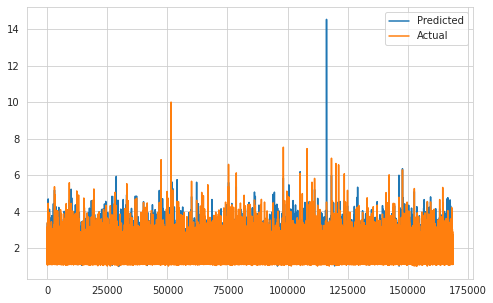

In [197]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [198]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [199]:
lasso.score(X_train, y_train)

0.7396688011463738

In [200]:
lasso.coef_

array([-0.002434  ,  1.06164287,  0.03386474, -0.        , -0.00125593,
        0.01505611,  0.0062324 ,  0.045351  ,  0.00497162,  0.00724167,
        0.        ])

In [201]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters =  {'alpha' : [0.10, 1, 3, 5]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.1, 1, 3, 5]},
             scoring='neg_mean_squared_error')

In [202]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -0.005589707186397601


In [203]:
y_pred_lasso = lasso_regressor.predict(X_test)

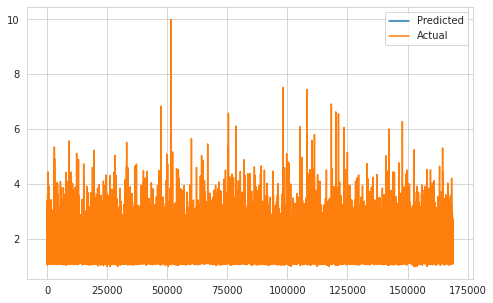

In [204]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [205]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.09327314426335498
RMSE : 0.30540652295482323
R2 : -0.00594598532654711
Adjusted R2 :  -0.006011512669595875


In [206]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha' :[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [207]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -0.0014464635712512126


In [208]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [209]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.030248927651306923
RMSE : 0.1739221884961977
R2 : 0.6737668964460952
Adjusted R2 :  0.6737456456147362


In [210]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [211]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [212]:
elasticnet.score(X_train, y_train)

0.0

In [213]:
y_pred_en = elasticnet.predict(X_test)


In [214]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.09327314426335498
RMSE : 0.30540652295482323
R2 : -0.00594598532654711
Adjusted R2 :  -0.006011512669595875


In [216]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [217]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-08, 'l1_ratio': 0.8}

Using  {'alpha': 1e-08, 'l1_ratio': 0.8}  the negative mean squared error is:  -0.001446384327768091


In [218]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [219]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.03025021321126169
RMSE : 0.17392588424746241
R2 : 0.6737530317491817
Adjusted R2 :  0.673731780014676


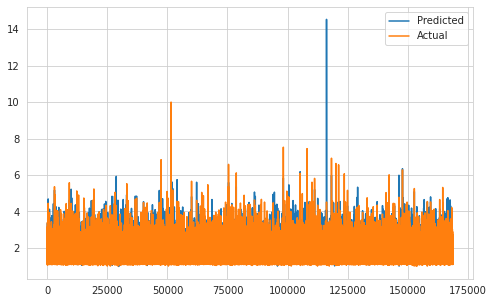

In [220]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()